In [1]:
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline
SEED = 16012018
prng = np.random.RandomState(SEED)

In [109]:
from sklearn import datasets, utils
import pandas as pd
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, 
                  columns=iris.feature_names)
df['species'] = iris.target
df['species'].replace({0:'Setosa', 1:'Versicolour', 
                       2:'Virginica'}, inplace=True)
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

Observations

Many datasets are multivariate, and often those variables are %%contain a a mix of quantative and qualitative attributes. The Iris dataset \cite{fisher_use_1936-1, _uci_????} is a well known example %%of data commonly found in machine learning literature because it has 150 observations and contains both discrete and continous variables. The version visualized in the introduction to this paper is obtained from the scikit-learn Python machine learning library \cite{scikit-learn}. 

The Iris dataset contains the following attributes:
\begin{enumerate}
\item Sepal length (cm)
\item Sepal width (cm)
\item Petal length (cm)
\item Petal width (cm)
\item Species
\end{enumerate}

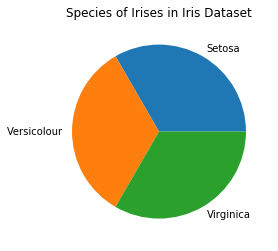

In [124]:
fig, ax = plt.subplots()
df['species'].value_counts().plot.pie(ax=ax)
ax.set_title("Species of Irises in Iris Dataset")
ax.set_aspect("equal")
ax.set_ylabel("")
fig.savefig("iris_pie.png")

Bertin posits that visualizations are a set of components related through an invariant: \cite{bertin_semiology_2011}:
\begin{description}
\item[invariant] - invariable common ground
\item[components] - a finite set of variational concepts
\end{description}

In figure~/ref{fig:iris_pie}, the invariant is the count of species and the components are the species themselves. In other words, the invariant is the value or calculation being visualized, and the components are usually the values on the axis and any variable encoded by what Bertin terms a retinal variable \cite{bertin_semiology_2011,krygier_making_2005}, which are the position, size, shape, color, and texture of the points, lines, or polygons in any visualization. 

\begin{figure}
%bertin's retinal variables
\caption{This tabular form of Bertin's retinal variables is from Understanding Graphics \cite{_information_????} reproduced from Making Maps: A Visual Guide to Map Design for GIS \cite{krygier_making_2005}}
\end{figure}

\begin{figure}
\incudegraphic{munzner_datatypes}
\caption{Figure from Munzner's website \cite{_visualization_????}}
\end{figure}
A special class of data variables are those that provide situational information about an observational measurement, such as the time and place the observation was recorded. Tamara Munzner provides a classification system for thinking about the semantics of a variable \cite{munzner_what_2014}:
\begin{description}
\item[value] measurement of interest 
\item[key] index attribute to look up value
\end{description}

\begin{tabular}{ l c r }
  Munzner & Statistics & Data Warehousing \\
  key & independent attribute & dimension \\
  value & dependent attribute & measurement\\
\end{tabular}

Expanding on Munzner's key and value semantics, in many datasets the keys are discrete variables like time or geophysical location that are sampled from a continous curve, surface, or field. While these observations are discrete samples from the continous space, often the continuinous (functional) characteristic of the observational space is what is of interest. 

While the Iris dataset does not have any variables that seem to traditionally fit into the model of keys-as it has no time or space variables-an analogous look-up task for the Iris dataset is to filter on a component and then look at the probabiluty distributions of the other variables in relation tp that key. In effect this treats all variables as potential keys into distributions of the other variables. In the parallel coordinates plot (PCP) in figure~\ref{fig:iris_parallel.png}, each line is an observation in the dataset, and each color maps to a species of Iris. The color coding then allows for this visualization to be used to show how the four quantative variables (sepal length, sepal width, petal length, and petal width) distribute within each variable. 

The visualization then becomes a way of visualizing the conditional probability of A given B:
\begin{equation}
P(A\mid B) = \frac{P(A \cap B}{P(B)} 
\end{equation}

wherein A is the observation vector $\left< \text{sepal length, sepal width, petal length, petal width} \right>$ and B in turn takes on each species of petal. The locations of the color and width of the colored band act as proxies for the distribution of each quantative variable and the overall observation vector. 

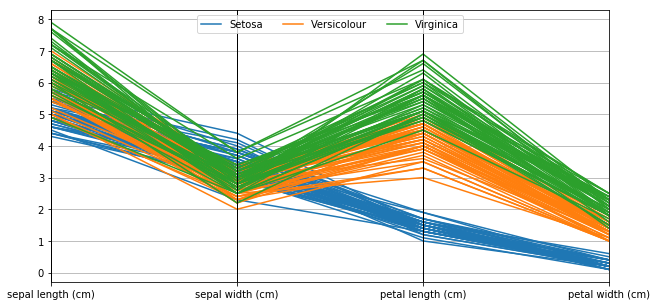

In [123]:
fig, ax = plt.subplots(figsize=(10,5))
pd.plotting.parallel_coordinates(df, 'species', ax=ax,
                                color=['tab:blue', 'tab:orange', 'tab:green'])
ax.legend(loc=9, ncol=3)
fig.savefig("iris_parallel.png")

Conditional probability gives an indication of how often one event occurs given another, but the events could be independent of each other and other events in the dataset. Conditional dependency occurs when two events A and B are independent of each other, but occur in conjunction with an event C \cite{dawid_conditional_1979}. In figure~\ref{fig:iris_observations.png}, the scatterplots show the pairwise relationship between quantative variables and the red, orange, and blue indicating the different species can be used as a proxy for event C. The diagonal in the scatter matrix in figure~\ref{fig:iris_observations} presents the probability distribution of each variable, computed using kernal density estimation \cite{scott_multivariate_1992, chambers_graphical_1983, stigler_mathematical_1978}, relative each categorical event (species). When isolated by color, the diagonal of the matrix yields the conditional probability of each quantatve variable for each category of species. Each of the colored scatterplots also shows the co-occurance of two quantative events (A and B) and how they distribute by species (event C). In figure~/fig{ref:iris_observations}, the distinct clusters by color indicate that the species has a strong effect on how the variables are correlated to each other. For example, the sepal length and petal length do not seem to be strongly correlated for the Iris setosa (blue dots) but their cooccurance 

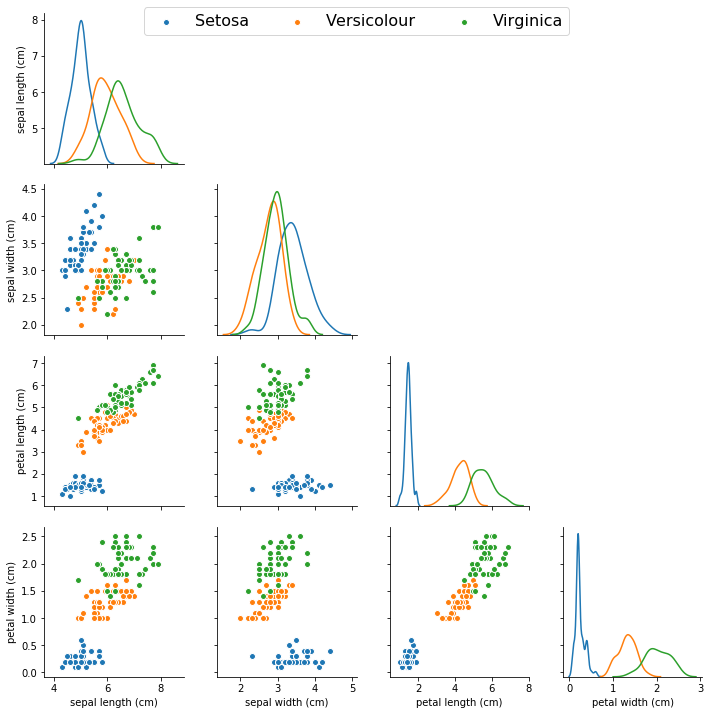

In [188]:
import seaborn as sns
#fig, ax = plt.subplots(figsize=(10,10))
g = sns.pairplot(df, hue='species', diag_kind="kde")

for ax in g.axes[np.triu_indices(4,1)].flatten():
    ax.set_visible(False)
g.fig.get_children()[-1].set_visible(False)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles, labels, loc='upper center',
             fontsize=16, ncol=16)

g.savefig("iris_observations.png")

As exemplified by the scatter matrix in figure ~/ref{fig:iris_observations.png}, there are a number of visualization techniques that can be used to explore conditional dependencies, but these methods are limited to datasets where the observations are discrete. There are visualization techniques for understanding the probability distributions of functional observations that could potentially be leverged in conjunction with these methods to develop methods for visualizing conditional dependencies in a functional space. This paper provides a sampling of the following visualizations:

1. methods for visualizing conditional dependency for discrete observations
2. methods for visualizing uncertainity and probabilistic visualizations for functional observations



